# Feature Selection

In [1]:
!pip install imblearn

     |████████████████████████████████| 167 kB 10.9 MB/s eta 0:00:01
     |████████████████████████████████| 22.2 MB 14.8 MB/s eta 0:00:01    |██████████████▏                 | 9.9 MB 14.8 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest, mutual_info_classif, SelectPercentile

from imblearn.over_sampling import RandomOverSampler, SMOTE

## Import Dataset

In [49]:
accidents = pd.read_csv('data/accidents.csv', index_col=0)
for idx, feature in enumerate(accidents.columns):
    print('{}. {}'.format(idx, feature))

0. POSTED_SPEED_LIMIT
1. TRAFFIC_CONTROL_DEVICE
2. DEVICE_CONDITION
3. WEATHER_CONDITION
4. LIGHTING_CONDITION
5. FIRST_CRASH_TYPE
6. TRAFFICWAY_TYPE
7. ALIGNMENT
8. ROADWAY_SURFACE_COND
9. ROAD_DEFECT
10. CRASH_TYPE
11. INTERSECTION_RELATED_I
12. NOT_RIGHT_OF_WAY_I
13. PRIM_CONTRIBUTORY_CAUSE
14. INJURIES_UNKNOWN
15. CRASH_HOUR
16. CRASH_DAY_OF_WEEK
17. CRASH_MONTH
18. crash_date
19. crash_month
20. is_fatal_or_incap
21. time_of_day
22. is_weekend
23. season
24. is_no_sunlight
25. is_cyclist
26. is_pedestrian
27. is_head_on
28. is_parked
29. is_using_cellphone
30. has_disregarded_traffic_devices
31. is_failed_to_yield_right_of_way
32. is_reckless_driving
33. is_improper_backing
34. is_intersection_related_involve
35. is_not_right_of_way_involve
36. is_sleet_snow
37. is_rain
38. is_clear_weather
39. is_dark_has_no_lighting
40. has_stop_sign_or_traffic_light
41. is_intersection
42. has_snow_ice_on_road
43. is_non_functioning_device
44. has_no_controls
45. has_no_physical_divider
46. is_

## Split Data and Determine Features to Assess
Selecting features solely based on training data.

In [50]:
indices = [0, 22] + list(range(24, 54))
selected_features = list(accidents.columns[indices])
# selected_features

In [51]:
X = accidents[selected_features]
y = accidents['is_fatal_or_incap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [52]:
# OVERSAMPLING

oversampler = RandomOverSampler(sampling_strategy=0.75, random_state=3)
#oversampler = SMOTE(sampling_strategy=0.75, random_state=3)
X_over, y_over = oversampler.fit_resample(X_train.to_numpy(), y_train.to_numpy())

## Mutual Information

In [62]:
mutual_info_scores = mutual_info_classif(X_over, y_over)
mutual_info_scores

array([3.11710402e-03, 6.79806441e-03, 1.36547579e-02, 6.56708185e-02,
       7.45455371e-04, 2.86914992e-02, 0.00000000e+00, 9.77047603e-03,
       8.65082848e-03, 3.15961108e-03, 7.39802082e-03, 2.58374378e-02,
       0.00000000e+00, 7.74373052e-07, 2.75263383e-03, 3.09244557e-02,
       7.98860541e-04, 1.75694033e-02, 1.93938715e-03, 3.20687615e-04,
       3.09623058e-04, 2.18513642e-02, 2.16440279e-02, 1.29828357e-02,
       2.94003978e-04, 1.91347610e-03, 6.52125217e-03, 5.64407284e-03,
       1.62099828e-03, 1.90018819e-03, 3.26823877e-03])

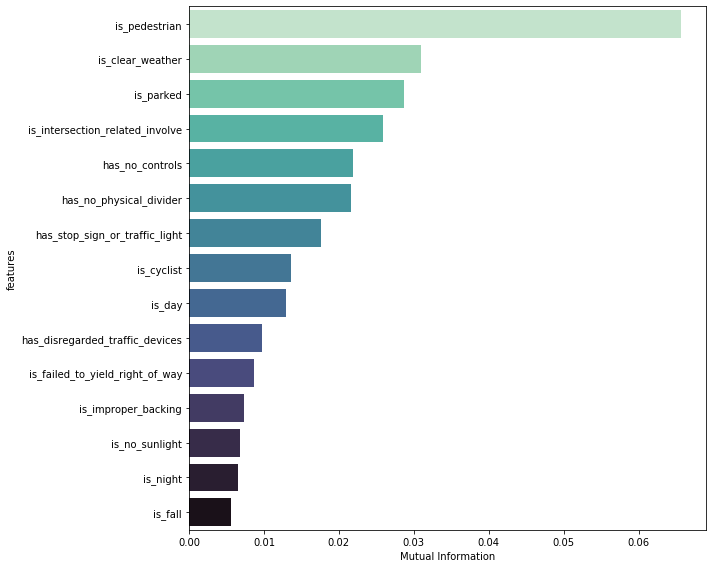

In [65]:
mi_df = pd.DataFrame()
mi_df['features'] = X.columns
mi_df['mutual_info_score'] = mutual_info_scores
mi_df.sort_values('mutual_info_score', ascending=False, axis=0, inplace=True)
mi_df2 = mi_df.iloc[:15, :]

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(data=mi_df2,x='mutual_info_score', y='features', palette='mako_r', ax=ax)
#ax.set_title('Mutual Information Scores', fontsize=16)
ax.set_xlabel('Mutual Information')
ax.set_yticklabels(mi_df['features'])
fig.tight_layout();

fig.savefig('img/mutual_info_scores.png')

In [61]:
mi_df

,features
0,is_weekend
1,is_no_sunlight
2,is_cyclist
3,is_pedestrian
4,is_head_on
5,is_parked
6,is_using_cellphone
7,has_disregarded_traffic_devices
8,is_failed_to_yield_right_of_way
9,is_reckless_driving


## Chi-Squared

Can only use categorical features.

In [55]:
indices = [22] + list(range(24, 54))
selected_features_chi2 = list(accidents.columns[indices])

In [56]:
X = accidents[selected_features_chi2]
y = accidents['is_fatal_or_incap']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [57]:
# OVERSAMPLING
oversampler = RandomOverSampler(sampling_strategy=0.75, random_state=3)
#oversampler = SMOTE(sampling_strategy=0.5, random_state=3)

X_over, y_over = oversampler.fit_resample(X_train.to_numpy(), y_train.to_numpy())

In [58]:
# First array is comprised of the F-scores.
# Second array is comprised of the p-values.
f_score = chi2(X_over, y_over)

chi2_p_values = pd.DataFrame()
chi2_p_values['features'] = X_train.columns
chi2_p_values['p_value'] = f_score[1]
chi2_p_values['p_value'] = chi2_p_values['p_value'].apply(lambda x: np.round(x, decimals=5))
chi2_p_values.sort_values('p_value', ascending=True, axis=0, inplace=True)

chi2_p_values

,features,p_value
0,is_weekend,0.00000
27,is_fall,0.00000
26,is_night,0.00000
24,is_evening,0.00000
23,is_day,0.00000
22,has_no_physical_divider,0.00000
21,has_no_controls,0.00000
20,is_non_functioning_device,0.00000
19,has_snow_ice_on_road,0.00000
18,is_intersection,0.00000
